# Part 4 Build Multiple Estimators
Some of the steps we will take to build a model include:
- Selecting the appropriate model
- Building a model
- Testing and training our model
- Evaluating and refining our model

In [1]:
import pandas as pd
import numpy as np

### Loading the Training Dataset

Training:
- polarity : Target 2:positive, 1:neutral, 0:negative
- words : preprocessed sentences
- type : the tags of the words from lemmatizing 

In [2]:
training = pd.read_csv('./train_test_data/training_bs.csv', encoding='utf8')
training.head()

,sentence,sentiment,lem_words,lem_tags,word_tags
0,Kind of a small place but I guess if they are ...,1,kind small place guess be not too busy be able...,NN JJ NN NN VB RB RB JJ VB JJ VB NN NN,"[kind/NN, small/JJ, place/NN, guess/NN, be/VB,..."
1,"Better than the bagel shop on the corner, but ...",1,better bagel shop corner not worth go way opinion,JJ NN NN JJ RB JJ VB NN NN,"[better/JJ, bagel/NN, shop/NN, corner/JJ, not/..."
2,We got most of it back at home with us.,1,get most back home,VB JJ RB NN,"[get/VB, most/JJ, back/RB, home/NN]"
3,"While it's not Nobu, it sure is a great deal a...",1,not nobu sure be great deal definitely leave f...,RB JJ RB VB JJ NN RB VB NN VB JJ,"[not/RB, nobu/JJ, sure/RB, be/VB, great/JJ, de..."
4,"Recommendations, of course, are required!",1,recommendation course be require,NN NN VB VB,"[recommendation/NN, course/NN, be/VB, require/VB]"


In [3]:
X_train = training['lem_words']
y_train = training['sentiment']

## Basline Accuracy

In [4]:
print y_train.value_counts(normalize=True)
baseline = 0.3

1    0.333333
2    0.333333
0    0.333333
Name: sentiment, dtype: float64


## Feature Transformation for Training Data
- random state to keep consistent


In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

lr = LogisticRegression(random_state=1)

## Count Vectorizer and Tfidf


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# initalise the vectoriser 
cvec = CountVectorizer()
cvec.fit(X_train)
#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)


from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)


/Users/annabopeep/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


# Finding an Estimator 
- Choosing an estimator which will perform at its optimum so can be tuned further.
- using both vectorisers to see which ones work best with models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          SGDClassifier(),
          SVC(),
          KNeighborsClassifier(), 
          MultinomialNB()
          ]

scores_cvec = []
scores_tvec = []
for model in models:
    print model
    
    score_cvec = cross_val_score(model, X_train_cvec, y_train, cv=3).mean()
    score_tvec = cross_val_score(model, X_train_tvec, y_train, cv=3).mean()
    
    print 'count vectoriser:', score_cvec
    print 'tfidf vectoriser:', score_tvec
    
    
    
    scores_cvec.append(score_cvec)
    scores_tvec.append(score_tvec)
    print '_'*70
    

/Users/annabopeep/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
count vectoriser: 0.8887606031307983
tfidf vectoriser: 0.8566610033197852
______________________________________________________________________
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
count vectoriser: 0.8962496753744537
tfidf vectoriser: 0.8941814586403587
______________________________________________________________________
SGDClassifier(alpha=0.00

In [9]:
mod = ['LogisticRegression', 'RandomForest', 'StochasticGradientDescent', 'SupportVectorMachine', 'KNeighbors', 'MultinomialNB']
mod_score = pd.DataFrame(zip(mod, scores_cvec, scores_tvec), columns = ['Model', 'scores_cvec', 'scores_tvec'])
mod_score 

,Model,scores_cvec,scores_tvec
0,LogisticRegression,0.888761,0.856661
1,RandomForest,0.896250,0.894181
2,StochasticGradientDescent,0.877520,0.906254
3,SupportVectorMachine,0.430821,0.646659
4,KNeighbors,0.727918,0.729165
5,MultinomialNB,0.828740,0.843746


In [10]:
baseline

0.3

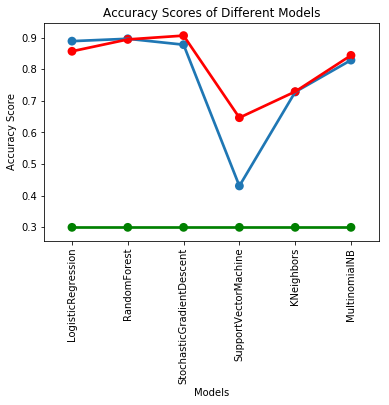

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(x='Model', y='scores_cvec', data =mod_score, label = 'cvec')
sns.pointplot(x='Model', y='scores_tvec', color='r' ,data =mod_score, label = 'tvec')
sns.pointplot(x='Model', y= [baseline, baseline, baseline, baseline, baseline, baseline], color='g' ,data =mod_score, label = 'baseline')


plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.title('Accuracy Scores of Different Models')
plt.show()

# Tuning models with highest scores


In [ ]:
LogisticRegression	0.888761
RandomForest	0.897925	0.886264
StochasticGradientDescent	0.895417	0.911259

Chosen methods for 

Count Vectorizer - blue
- Logistic Regression
- Random Forest

Tfidf - Red
- Random Forest
- SGDClassifier

RandomForestClassifier	0.935008	0.936253 very close scores so both will be searched
 
With limited time I have chosen a localised method to choose my classifier

 

## Count Vectorizer and LogReg
### to perform gridsearch for optimal parameters

- Different parameters work best in different combinations and different models. 
- gridseach will help us find the best ones for in combination for logistic regression


In [12]:
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score


In [18]:

p_cvec_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
    ])

param_cvec_lr = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
          'vect__max_features': (None, 5000, 10000, 50000),
          'vect__ngram_range': ((1, 1), (1, 2), (1,3), (1,4)), 
          'clf__penalty': ['l1','l2'],
          'clf__solver':['liblinear'],
          'clf__C': np.logspace(-10,10,21)
         }

grid_search = GridSearchCV(p_cvec_lr, param_cvec_lr, n_jobs=-1, verbose=1, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2688 candidates, totalling 8064 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1387 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1837 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2387 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3037 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3787 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4637 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 5587 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 6637 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7787 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 8064 out of 8064 | elapsed: 19.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2), (1, 3), (1, 4)), 'vect__max_df': (0.25, 0.5, 0.75, 1.0), 'clf__solver': ['liblinear'], 'clf__penalty': ['l1', 'l2'], 'clf__C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]), 'vect__max_features': (None, 5000, 10000, 50000)},
       pre_dispatch='2*n_jobs', refit=T

In [34]:
print 'Baseline:', baseline
print("Best score: %0.3f" % grid_search.best_score_)
print
#### get the best parameters
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_cvec_lr.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
 

Baseline: 0.3
Best score: 0.916

	clf__C: 10.0
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
	vect__max_df: 0.75
	vect__max_features: 5000
	vect__ngram_range: (1, 3)


# GridSearch Function

In [24]:
def grid_search(p_cvec_lr, param_cvec_lr, X_train, y_train):

    grid_search = GridSearchCV(p_cvec_lr, param_cvec_lr, n_jobs=-1, verbose=1, cv=3)
    grid_search.fit(X_train, y_train)

    print 'Baseline:', baseline
    print("Best score: %0.3f" % grid_search.best_score_)
    print
    #### get the best parameters
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param_cvec_lr.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
 

# Grid Search Class

In [49]:
class grid_search:
    def __init__(self, pipeline, parameters, X_train, y_train):
        
        self.pipeline = pipeline
        self.parameters = parameters
        self.X_train = X_train
        self.y_train = y_train
        
        from sklearn.model_selection import GridSearchCV
        
        self.gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3)
        return gs.fit(X_train, y_train)
    
#     def fit(self, X_train, y_train):
        
# #         self.best_score_ = 
#         return self.gs
    
#     def best_score_
    
    
#     grid_search = GridSearchCV(p_cvec_lr, param_cvec_lr, n_jobs=-1, verbose=1, cv=3)
#     grid_search.fit(X_train, y_train)

#     print 'Baseline:', baseline
#     print("Best score: %0.3f" % grid_search.best_score_)
#     print
#     #### get the best parameters
#     best_parameters = grid_search.best_estimator_.get_params()
#     for param_name in sorted(param_cvec_lr.keys()):
#         print("\t%s: %r" % (param_name, best_parameters[param_name]))
grid_search(p_cvec_lr, param_cvec_lr, X_train, y_train)

TypeError: __init__() should return None

# Pipeline Tune Hyperparameters
- CountVectorizer 
- TfidfVectorizer
- RandomForestClassifier
- SGDClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score


### Random Forest 
- CountVectorizer 
- TfidfVectorizer

In [34]:
#### Count Vec && Random Forest
p_cvec_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
    ])

param_cvec_rf = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
                 'vect__max_features': (None, 5000, 10000, 50000),
                 'vect__ngram_range': ((1, 1), (1, 2), (1,3), (1,4)),
                 'clf__max_depth':[None,1,2,3,4,5,6],
#                  'clf__max_features':[1,2,3,4], ???
                 'clf__max_leaf_nodes':[5,6,7,8,9,10], 
                 'clf__min_samples_leaf':[1,2,3,4],
#                  'clf__min_samples_split':[1,2,3,4]???
                }



#### Tfidf Vec && Random Forest
p_tvec_rf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
    ])

param_tvec_rf = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
                 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                 'clf__max_depth':[None,1,2,3,4,5,6],
#                  'clf__max_features':[1,2,3,4], 
                 'clf__max_leaf_nodes':[5,6,7,8,9,10], 
                 'clf__min_samples_leaf':[1,2,3,4],
#                  'clf__min_samples_split':[1,2,3,4]
                }

In [28]:
print grid_search(p_cvec_rf, param_cvec_rf, X_train, y_train)

Fitting 3 folds for each of 10752 candidates, totalling 32256 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 19

Baseline: 0.3
Best score: 0.570

	clf__max_depth: None
	clf__max_leaf_nodes: 10
	clf__min_samples_leaf: 2
	vect__max_df: 1.0
	vect__max_features: 50000
	vect__ngram_range: (1, 1)
None


In [35]:
print grid_search(p_tvec_rf, param_tvec_rf, X_train, y_train)

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 6048 out of 6048 | elapsed:  9.0min finished


Baseline: 0.3
Best score: 0.578

	clf__max_depth: None
	clf__max_leaf_nodes: 10
	clf__min_samples_leaf: 4
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)
None


### SGDC 
- CountVectorizer
- TfidfVectorizer

In [ ]:
#### Count Vec && SGDC
p_cvec_sg = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier())
    ])

param_cvec_sg = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
                 'vect__max_features': (None, 5000, 10000, 50000),
                 'vect__ngram_range': ((1, 1), (1, 2), (1,3), (1,4)),
                 'clf__loss': ['log'],
                 'clf__penalty': ['l1','l2'],
                 'clf__alpha': np.logspace(-5,1,15)
                }

                    
#### Tfidf Vec && SGDC
p_tvec_sg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier())
    ])


param_tvec_sg = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
                 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                 'clf__loss': ['log'],
                 'clf__penalty': ['l1','l2'],
                 'clf__alpha': np.logspace(-5,1,15)
                }

In [36]:
print grid_search(p_cvec_sg, param_cvec_sg, X_train, y_train)

Performing grid search...
('pipeline:', ['vect', 'clf'])
Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  7.9min finished


done in 476.514s

Baseline: 0.3
Best score: 0.918



KeyError: 'clf__C'

In [32]:
print grid_search(p_tvec_sg, param_tvec_sg, X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.2min finished


Baseline: 0.3
Best score: 0.920

	clf__alpha: 1e-05
	clf__loss: 'log'
	clf__penalty: 'l1'
	vect__max_df: 1.0
	vect__ngram_range: (1, 3)
None


With limited time I have chosen a localised method to choose my classifier

### Notes for model! 
An example of a model statement might look like this:
"Completed a logistic regression using Statsmodels. Calculated the probability of a customer placing another order with the company."
Here, we are using a logistic model because we are trying to determine the probability that a customer might place a return order, which is - at its heart - a classification problem.

Share your technical findings with your fellow data scientists. Explain your goals, describe modeling choices, evaluate model performance, and discuss results. Data science reporting is technical, but don’t forget that you should tell a compelling story about your data.

- **Requirements**: Summarize your goals and metrics for success, variables of interest, and removal of any outliers or data imputation. Your process description should be concise and relevant to your goals. Summarize statistical analysis, including model selection,  implementation, evaluation, and inference. Be convincing – justify all important decisions! Clearly label plots and visualizations. Include an Executive Summary.



#  null values 
I checked for null values when loading the cleaned training data and found 1 row. It was identified that the text of the review was one numeric value before the cleaning process. This must have been an empty value which was then saved into the csv 

# Decision Trees 
max_depth	How many nodes deep can the decision tree go?
max_features	Is there a cut off to the number of features to use?
max_leaf_nodes	How many leaves can be generated per node?
min_samples_leaf	How many samples need to be included at a leaf, at a minimum?
min_samples_split	How many samples need to be included at a node, at a minimum?


